In [12]:
import os
import numpy as np
from bs4 import BeautifulSoup
import tensorflow as tf
from PIL import Image
from six import BytesIO
from object_detection.utils import visualization_utils as viz_utils



path = '/home/evan/Datasets/Hand Images/train/'
images_and_labels = os.listdir(path)
images_and_labels.sort()
labels = [x for x in images_and_labels if x.endswith('.xml')] 
labels
%matplotlib inline

In [13]:
 labels_np = []
 for filename in labels:
    infile = open(path+filename,"r")
    contents = infile.read()
    soup = BeautifulSoup(contents,'xml')
    xmin = soup.xmin.string
    ymin = soup.ymin.string
    xmax = soup.xmax.string
    ymax = soup.ymax.string
    label = np.array([[xmin,ymin,xmax,ymax]], dtype=np.float32)/[[3000,4000,3000,4000]]
    label = label * [[1,3/4,1,3/4]] #match label and picture aspect ratios to both 1:1
    labels_np.append(label)

In [14]:
labels_np

[array([[0.23866667, 0.0553125 , 0.25733333, 0.0748125 ]]),
 array([[0.10566667, 0.0511875 , 0.15133333, 0.06825   ]]),
 array([[0.237     , 0.000375  , 0.28066667, 0.0170625 ]]),
 array([[0.02866667, 0.0594375 , 0.06566667, 0.076125  ]]),
 array([[0.09066667, 0.032625  , 0.11533333, 0.045375  ]]),
 array([[0.12466667, 0.066     , 0.15166667, 0.0800625 ]]),
 array([[0.115    , 0.0241875, 0.135    , 0.0358125]]),
 array([[0.24433333, 0.057     , 0.26166667, 0.0729375 ]]),
 array([[0.188   , 0.0495  , 0.219   , 0.067875]]),
 array([[0.032    , 0.0735   , 0.074    , 0.0928125]]),
 array([[0.1       , 0.0350625 , 0.12366667, 0.0511875 ]]),
 array([[0.03533333, 0.032625  , 0.06066667, 0.0489375 ]]),
 array([[0.20966667, 0.0283125 , 0.238     , 0.0495    ]])]

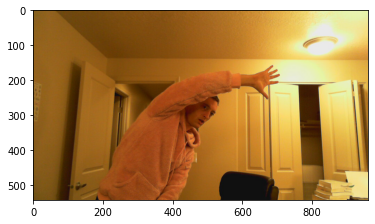

In [17]:
import matplotlib.pyplot as plt
images = [x for x in images_and_labels if x.endswith('.jpg')] 

train_images_np = []
for image_path in images:
    image = Image.open(path + image_path)
    image.resize((960,544))
    (im_width ,im_height) = image.size

    image = np.array(image.getdata())
    image = image.reshape((im_height, im_width, 3))
    image = image.astype(np.uint8)
    plt.imshow(image)


In [16]:
image = Image.open('/home/evan/Pictures/Headphone Images/internal/20210928_110934.jpg')
image = image.resize((640,640))
(im_width ,im_height) = image.size

image = np.array(image.getdata())
image = image.reshape((im_height, im_width, 3))
image = np.swapaxes(image,0,1)
image = image.astype(np.uint8)
image

FileNotFoundError: [Errno 2] No such file or directory: '/home/evan/Pictures/Headphone Images/internal/20210928_110934.jpg'

In [ ]:
image.shape

(640, 640, 3)

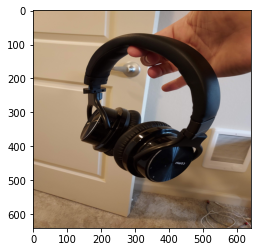

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(image)